# Question 01
- Pick any two other dog breeds than in the class example.
- Import the images and resize and grayscale. 
- Examine the images using an average of pixels method.
- Develop a CNN using a similar technique to the class example (note for the saliency maps you might have to use channels last).
- Curate 10 images (5 per class) and evaluate the model.
- Examine the Saliency maps for 10 images and evaluate them.

## Imports Class

In [1]:
# Tensorflow 2
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten


import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline  

from PIL import Image
import glob


from tensorflow.keras.models import Model

from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

from tf_keras_vis.saliency import Saliency
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.activation_maximization.callbacks import Progress
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D
from tf_keras_vis.activation_maximization.regularizers import TotalVariation2D, Norm
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

## Load Images and pre-process
- Import the images and resize and grayscale

In [3]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

w, h = 64, 64

X, Y = [], []

# for the maltese
for filename in glob.glob('Maltese/*.jpg'):
  # Convert image into gray scale
  im = Image.open(filename).convert('L')
  # Resize the images
  im = im.resize((w, h), Image.ANTIALIAS)
  # Convert to numpy array
  arr = np.array(im)
  # Add images to the lists and class
  X.append(arr)
  Y.append(0)

# for the borzoi"
for filename in glob.glob('Borzoi/*.jpg'):
  im = Image.open(filename).convert('L')
  im = im.resize((w, h), Image.ANTIALIAS)

  arr = np.array(im)
  X.append(arr)
  Y.append(1)


# Convert to NP array
X = np.array(X)
# reshape to be [samples][channels][width][height]
X = X.reshape(X.shape[0], w, h, 1).astype('float32')
# Normalize the data
X = X /255

# one hot encode outputs
Y = np.array(Y)

# randomize the data set - numpy arrays
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
Y = Y[randomize]


Y = to_categorical(Y)
num_classes = Y.shape[1]

C:\Users\Wan Yit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  from ipykernel import kernelapp as app
C:\Users\Wan Yit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:25: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.


403


## Examine the images using an average of pixels method

In [4]:
# averageim = np.array(grayScale[0], 'f')

# for imname in grayScale[1:]:
#     averageim += np.array(imname)

# averageim /= len(grayScale)

# # Data is in Numpy array
# print(averageim)

# plt.rcParams['figure.figsize'] = [10, 10]
# plt.imshow(averageim, cmap=plt.cm.gray)
# plt.show()

## Develop a CNN using a similar technique to the class example (note for the saliency maps you might have to use channels last).

Train on 270 samples, validate on 133 samples
Epoch 1/10
270/270 [==============================] - 3s 9ms/sample - loss: 0.7640 - acc: 0.4593 - val_loss: 0.6792 - val_acc: 0.6391
Epoch 2/10
270/270 [==============================] - 0s 578us/sample - loss: 0.6686 - acc: 0.6185 - val_loss: 0.6487 - val_acc: 0.6391
Epoch 3/10
270/270 [==============================] - 0s 567us/sample - loss: 0.6502 - acc: 0.6259 - val_loss: 0.6816 - val_acc: 0.5263
Epoch 4/10
270/270 [==============================] - 0s 558us/sample - loss: 0.6256 - acc: 0.6889 - val_loss: 0.6045 - val_acc: 0.6617
Epoch 5/10
270/270 [==============================] - 0s 552us/sample - loss: 0.6176 - acc: 0.6852 - val_loss: 0.5860 - val_acc: 0.6541
Epoch 6/10
270/270 [==============================] - 0s 542us/sample - loss: 0.5874 - acc: 0.6852 - val_loss: 0.6124 - val_acc: 0.6316
Epoch 7/10
270/270 [==============================] - 0s 753us/sample - loss: 0.5475 - acc: 0.7296 - val_loss: 0.6039 - val_acc: 0.7143
Epoc

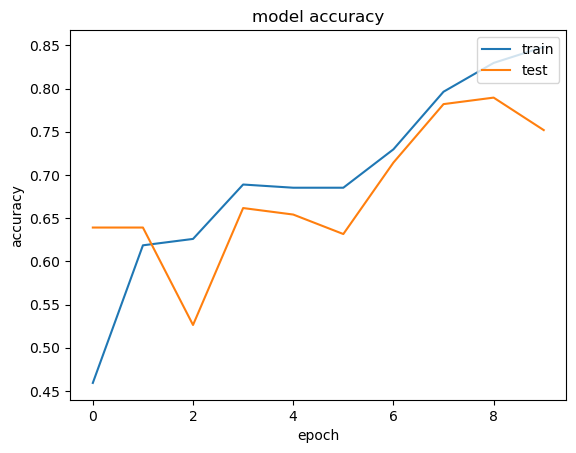

In [5]:
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Conv2D(32, (3, 3), strides=1, padding="valid", input_shape=(w, h,1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))
model.add(Conv2D(64, (3, 3), strides=1, padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=10, batch_size=32, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

kernel Size: 3


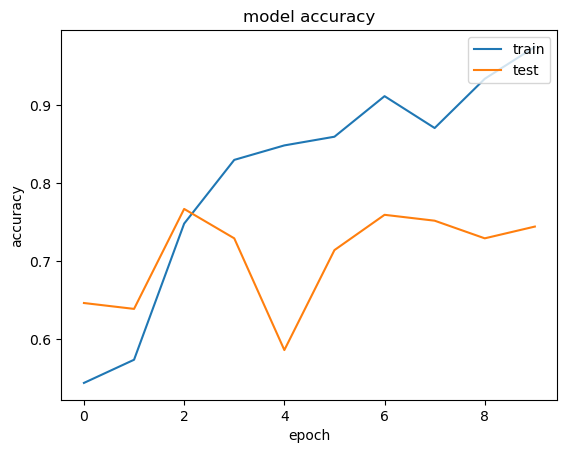

kernel Size: 5


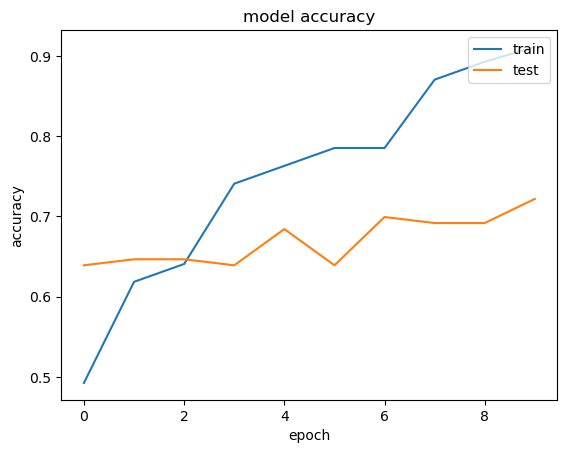

kernel Size: 7


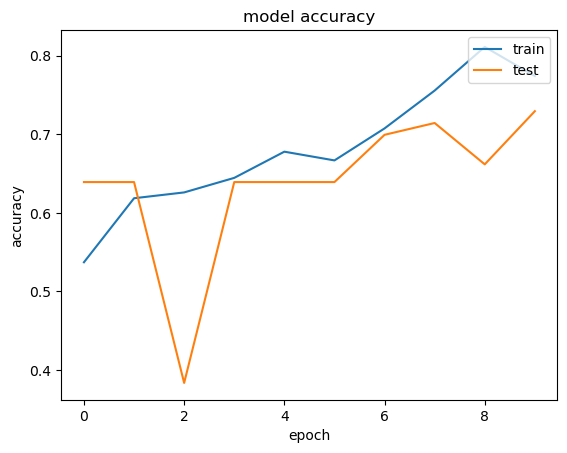

In [6]:
kernelSizes = [3,5,7]
np.random.seed(seed)
tf.random.set_seed(seed)

for ks in kernelSizes:
    modelC = Sequential()
    modelC.add(Conv2D(32, (ks, ks), strides=1, padding="valid", input_shape=(w, h,1), activation='relu'))
    modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

    modelC.add(Flatten())
    modelC.add(Dense(128, activation='relu'))
    modelC.add(Dense(num_classes, activation='softmax'))


    modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

    # Fit the model
    history = modelC.fit(X, Y, validation_split=0.33, epochs=10, batch_size=32, verbose=0)

    print("kernel Size:", ks)
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

Batch Size: 8


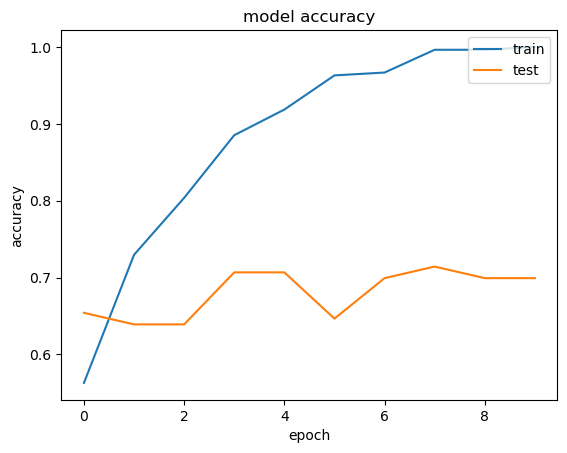

Batch Size: 24


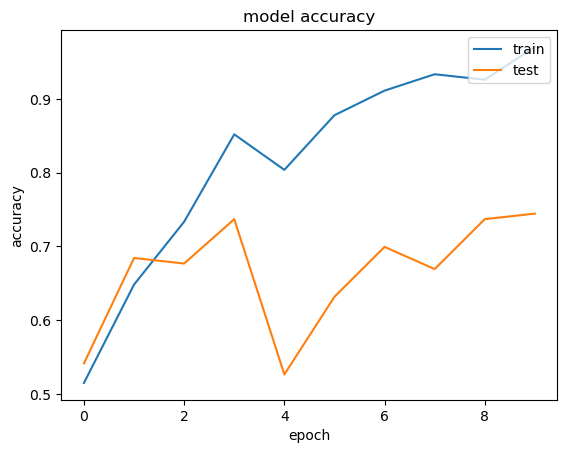

Batch Size: 32


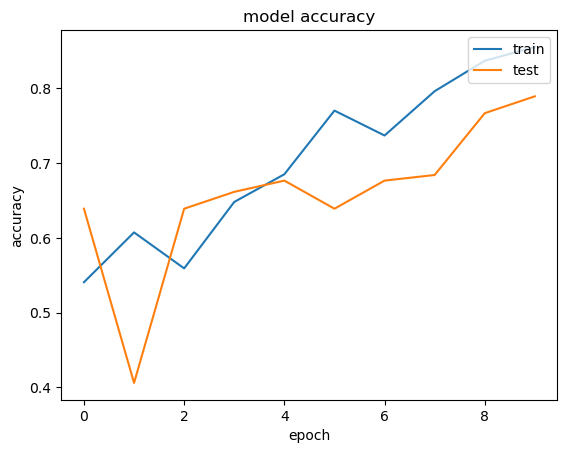

Batch Size: 64


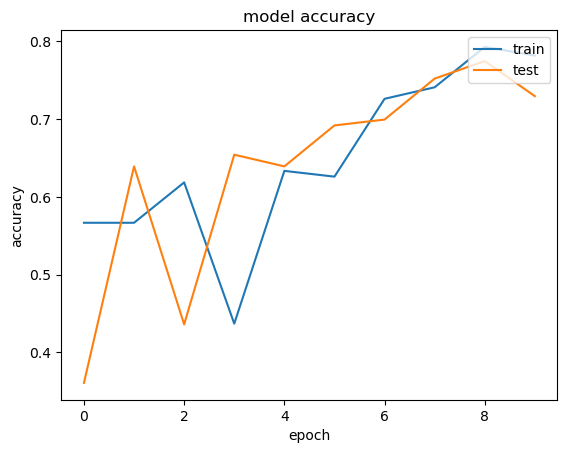

In [7]:
batchSizes = [8,24,32,64] # can not use bigger than 100 as only 100  images
np.random.seed(seed)
tf.random.set_seed(seed)

for bs in batchSizes:
    modelC = Sequential()
    modelC.add(Conv2D(32, (3, 3), strides=1, padding="valid", input_shape=(w, h,1), activation='relu'))
    modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

    modelC.add(Flatten())
    modelC.add(Dense(128, activation='relu'))
    modelC.add(Dense(num_classes, activation='softmax'))


    modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

    # Fit the model
    history = modelC.fit(X, Y, validation_split=0.33, epochs=10, batch_size=bs, verbose=0)

    print("Batch Size:", bs)
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

Final Model:

the best batch size = 24

early stopping = 10

kernel size = 3

Train on 403 samples
Epoch 1/10
403/403 [==============================] - 1s 2ms/sample - loss: 0.7124 - acc: 0.5608
Epoch 2/10
403/403 [==============================] - 0s 641us/sample - loss: 0.6360 - acc: 0.6402
Epoch 3/10
403/403 [==============================] - 0s 487us/sample - loss: 0.5774 - acc: 0.7146
Epoch 4/10
403/403 [==============================] - 0s 505us/sample - loss: 0.4944 - acc: 0.7767
Epoch 5/10
403/403 [==============================] - 0s 500us/sample - loss: 0.4229 - acc: 0.8362
Epoch 6/10
403/403 [==============================] - 0s 500us/sample - loss: 0.3688 - acc: 0.8511
Epoch 7/10
403/403 [==============================] - 0s 653us/sample - loss: 0.3622 - acc: 0.8561
Epoch 8/10
403/403 [==============================] - 0s 492us/sample - loss: 0.3293 - acc: 0.8536
Epoch 9/10
403/403 [==============================] - 0s 502us/sample - loss: 0.2789 - acc: 0.8908
Epoch 10/10
403/403 [==============================] - 0s 493us/sample - loss: 0.2047 - ac

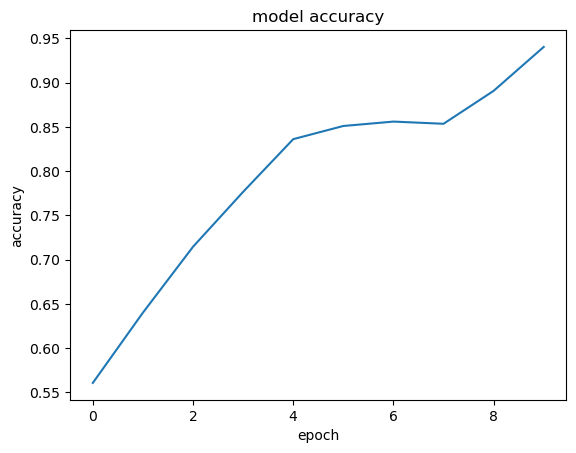

In [8]:
np.random.seed(seed)
tf.random.set_seed(seed)


model = Sequential()
model.add(Conv2D(32, (3, 3), strides=1, padding="valid", input_shape=(w, h,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))
model.add(Conv2D(64, (3, 3), strides=1, padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = model.fit(X, Y, validation_split=0, epochs=10, batch_size=24, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

## Curate 10 images (5 per class) and evaluate the model.


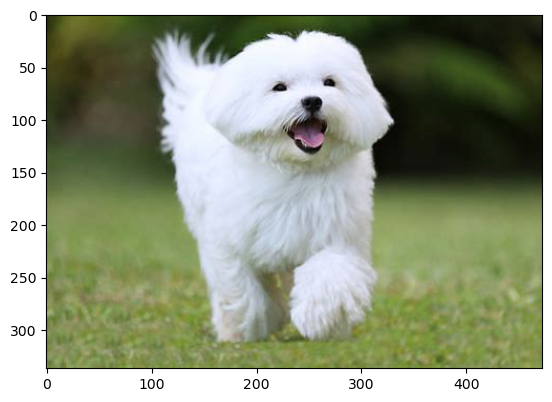

C:\Users\Wan Yit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  if sys.path[0] == "":


Predicted as
Maltese


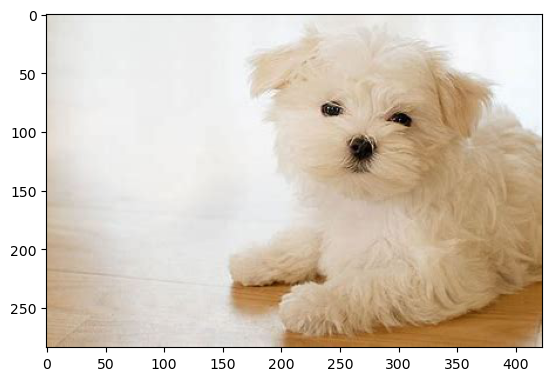

Predicted as
Maltese


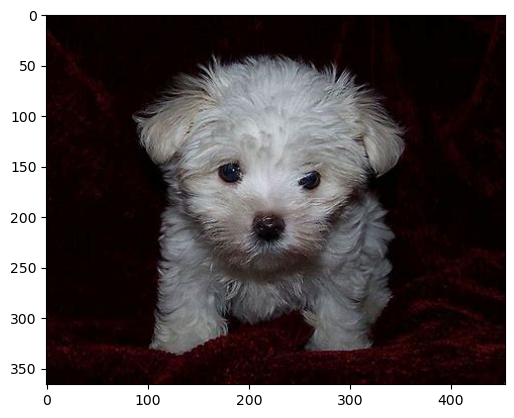

Predicted as
Maltese


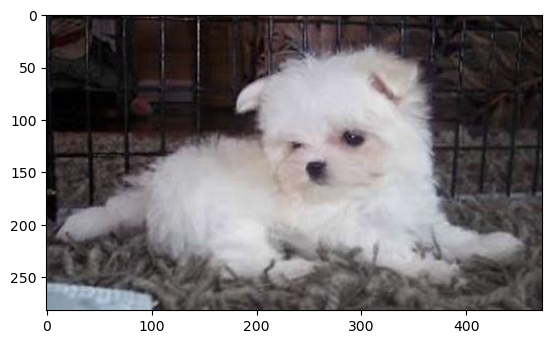

Predicted as
Maltese


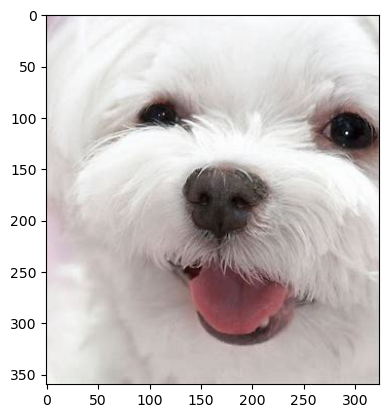

Predicted as
Maltese


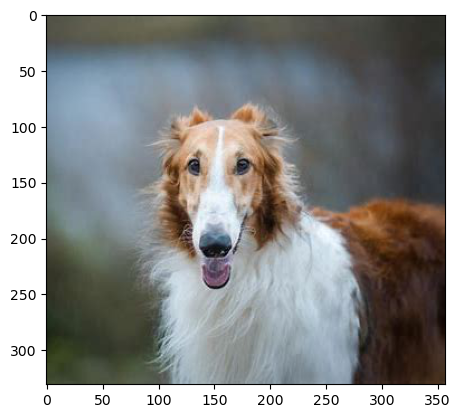

C:\Users\Wan Yit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:32: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.


Predicted as
Borzoi


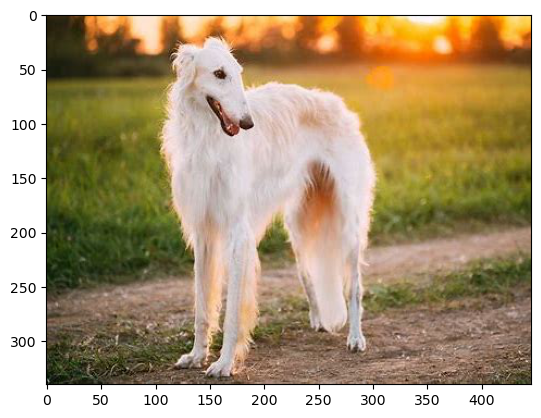

Predicted as
Borzoi


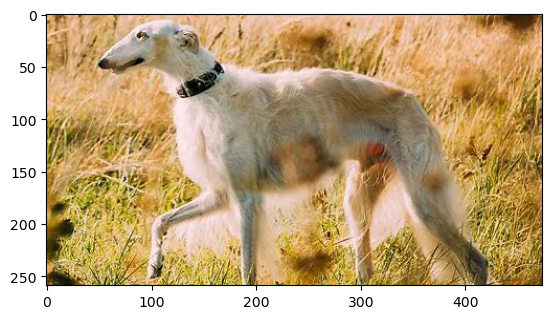

Predicted as
Borzoi


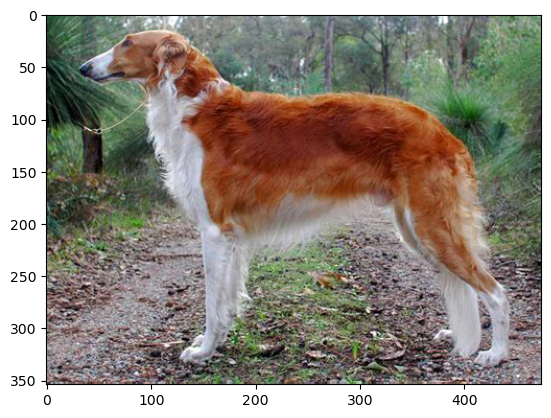

Predicted as
Maltese


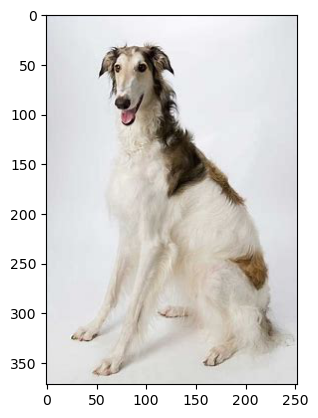

Predicted as
Borzoi



Model Accuracy: 90.0 %


In [18]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

correct = 0

for filename in glob.glob('test_m/*.jpg'):
    im=Image.open(filename)
    plt.imshow(im)
    plt.show()
    im = im.convert('L')
    im = im.resize((w,h),Image.ANTIALIAS)
    im = np.array(im)
    # reshape to be [samples][channels][width][height]
    im = im.reshape(1, w, h, 1).astype('float32')
    # Normalize the data
    im = im /255
    predict_x = model.predict(im) 
    result =np.argmax(predict_x,axis=1)
    print("Predicted as")
    if result[0] == 0:
        print("Maltese")
        correct += 1
    else:
        print("Borzoi")

for filename in glob.glob('test_b/*.jpg'):
    im=Image.open(filename)
    plt.imshow(im)
    plt.show()
    im = im.convert('L')
    im = im.resize((w,h),Image.ANTIALIAS)
    im = np.array(im)
    # reshape to be [samples][channels][width][height]
    im = im.reshape(1, w, h, 1).astype('float32')
    # Normalize the data
    im = im /255
    predict_x = model.predict(im) 
    result =np.argmax(predict_x,axis=1)
    print("Predicted as")
    if result[0] == 0:
        print("Maltese")
    else:
        print("Borzoi")
        correct += 1
        
print("\n\n\nModel Accuracy:", (correct/10) * 100, "%")

## Examine the Saliency maps for 10 images and evaluate them.

In [10]:
def plot_gradcam_plusplus_of_a_model(model, Xt, image_titles, class_values):
    score = CategoricalScore(class_values)
    # Create GradCAM++ visualization object
    gradcam = GradcamPlusPlus(model,
                          model_modifier=ReplaceToLinear(),
                          clone=True)
    # Generate heatmap with GradCAM++
    cam = gradcam(score,
                  Xt,
                  penultimate_layer=-1)

    # Plot
    f, ax = plt.subplots(nrows=1, ncols=5, figsize=(14, 8))
    for i, title in enumerate(image_titles):
        heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
        ax[i].set_title(title, fontsize=16)
        ax[i].imshow(Xraw[i], cmap="gray")
        ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
        ax[i].axis('off')
    plt.tight_layout()
    plt.show()

C:\Users\Wan Yit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  if __name__ == "__main__":


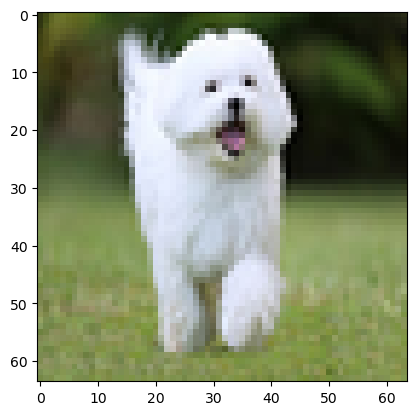

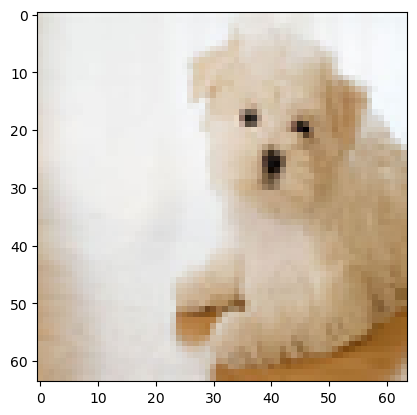

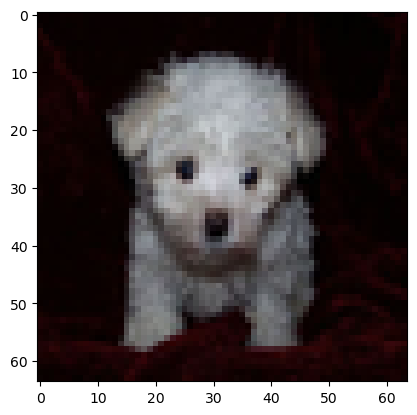

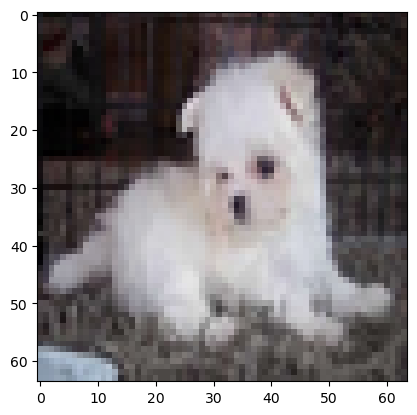

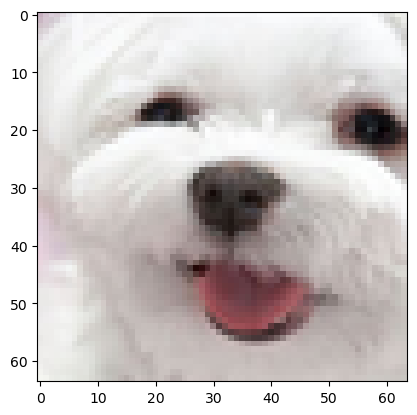

In [15]:
Xt =[]
Xraw = []
image_titles=[]
class_values=[]
counter = 1

for filename in glob.glob('test_m/*.jpg'):
    im=Image.open(filename)
    im = im.resize((w,h),Image.ANTIALIAS)
    plt.imshow(im)
    plt.show()
    im = im.convert('L')
    Xraw.append(im)
    
    im = np.array(im)
    # Normalize the data
    im = im /255
    Xt.append(np.array(im))
    name = "Maltese " + str(counter)
    counter +=1
    image_titles.append(name)
    class_values.append(0)

Xt = np.asarray(Xt)

Xt = Xt.reshape(Xt.shape[0], w, h, 1).astype('float32')

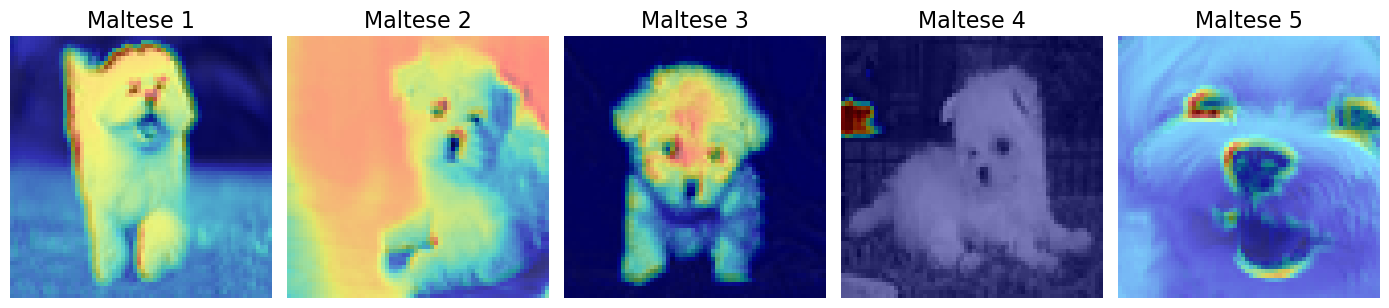

In [16]:
plot_gradcam_plusplus_of_a_model(modelC, Xt, image_titles, class_values)

C:\Users\Wan Yit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  if __name__ == "__main__":


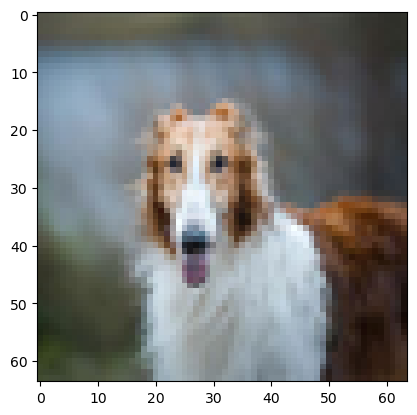

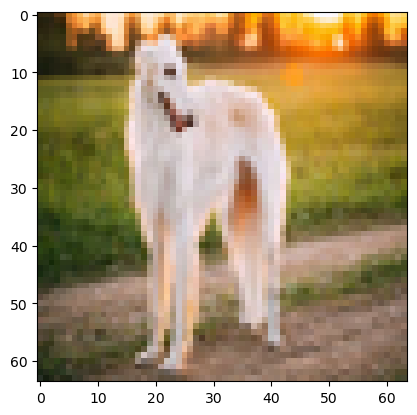

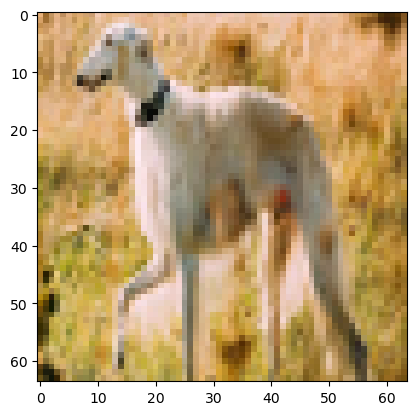

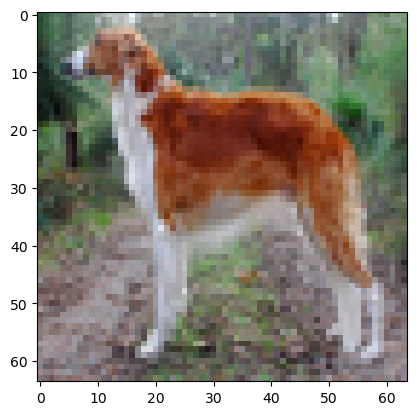

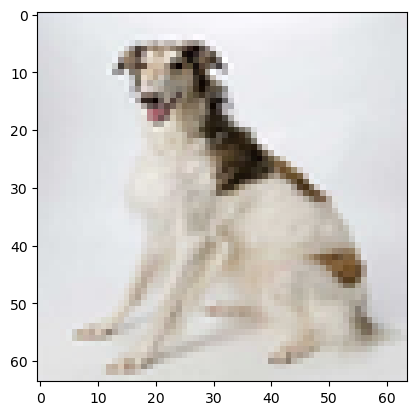

In [14]:
Xt =[]
Xraw = []
image_titles=[]
class_values=[]
counter = 1

for filename in glob.glob('test_b/*.jpg'):
    im=Image.open(filename)
    im = im.resize((w,h),Image.ANTIALIAS)
    plt.imshow(im)
    plt.show()
    im = im.convert('L')
    Xraw.append(im)
    
    im = np.array(im)
    # Normalize the data
    im = im /255
    Xt.append(np.array(im))
    name = "Borzoi " + str(counter)
    counter +=1
    image_titles.append(name)
    class_values.append(0)

Xt = np.asarray(Xt)

Xt = Xt.reshape(Xt.shape[0], w, h, 1).astype('float32')

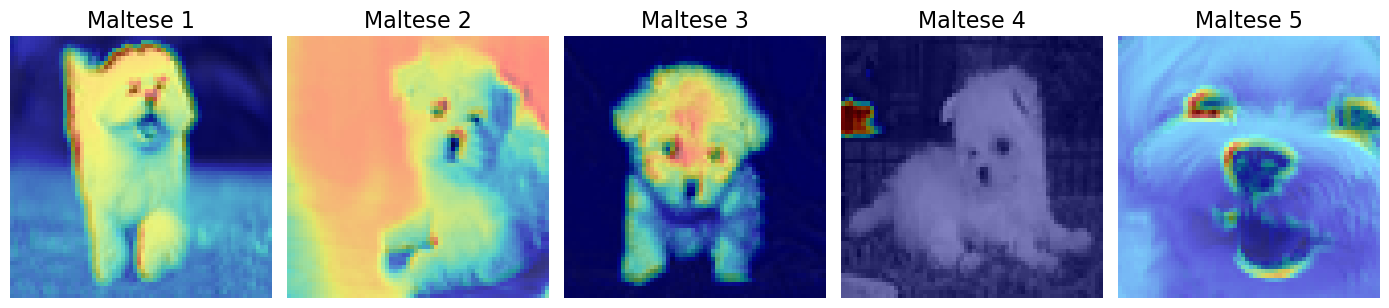

In [17]:
plot_gradcam_plusplus_of_a_model(modelC, Xt, image_titles, class_values)